In [1]:
import pandas as pd
import numpy as np
import altair as alt
alt.renderers.enable("notebook")

RendererRegistry.enable('notebook')

In [2]:
df = pd.read_csv("export.csv")

In [3]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [4]:
df

months_as_customer  age  policy_number     policy_bind_date policy_state  \
0                   328   48         521585  2014-10-17 00:00:00           OH   
1                   228   42         342868  2006-06-27 00:00:00           IN   
2                   134   29         687698  2000-09-06 00:00:00           OH   
3                   256   41         227811  1990-05-25 00:00:00           IL   
4                   228   44         367455  2014-06-06 00:00:00           IL   
5                   256   39         104594  2006-10-12 00:00:00           OH   
6                   137   34         413978  2000-06-04 00:00:00           IN   
7                   165   37         429027  1990-02-03 00:00:00           IL   
8                    27   33         485665  1997-02-05 00:00:00           IL   
9                   212   42         636550  2011-07-25 00:00:00           IL   
10                  235   42         543610  2002-05-26 00:00:00           OH   
11                  447   61         214618  1999-05-29 00:00:00           OH   
12                   60   23         842643  1997-11-20 00:00:00           OH   
13                  121   34         626808  2012-10-26 00:00:00           OH   
14                  180   38         644081  1998-12-28 00:00:00           OH   
15                  473   58         892874  1992-10-19 00:00:00           IN   
16                   70   26         558938  2005-06-08 00:00:00           OH   
17                  140   31         275265  2004-11-15 00:00:00           IN   
18                  160   37         921202  2014-12-28 00:00:00           OH   
19                  196   39         143972  1992-08-02 00:00:00           IN   
20                  460   62         183430  2002-06-25 00:00:00           IN   
21                  217   41         431876  2005-11-27 00:00:00           IL   
22                  370   55         285496  1994-05-27 00:00:00           IL   
23                  413   55         115399  1991-02-08 00:00:00           IN   
24                  237   40         736882  1996-02-02 00:00:00           IN   
25                    8   35         699044  2013-12-05 00:00:00           OH   
26                  257   43         863236  1990-09-20 00:00:00           IN   
27                  202   34         608513  2002-07-18 00:00:00           IN   
28                  224   40         914088  1990-02-08 00:00:00           OH   
29                  241   45         596785  2014-03-04 00:00:00           IL   
..                  ...  ...            ...                  ...          ...   
970                 213   35         844129  1990-09-20 00:00:00           OH   
971                  79   25         732169  2000-11-05 00:00:00           OH   
972                 232   44         221854  1994-10-03 00:00:00           OH   
973                 230   37         776950  2005-04-11 00:00:00           IL   
974                 234   41         291006  1990-05-16 00:00:00           IN   
975                 240   40         845751  2004-09-11 00:00:00           IN   
976                 143   33         889764  1993-11-30 00:00:00           OH   
977                 266   42         929306  2003-03-06 00:00:00           IN   
978                  89   32         515457  1996-12-18 00:00:00           IN   
979                 229   37         556270  1995-02-21 00:00:00           IN   
980                 245   40         908935  2009-12-11 00:00:00           IL   
981                  50   44         525862  2000-10-18 00:00:00           OH   
982                 230   43         490514  2007-02-09 00:00:00           IN   
983                  17   39         774895  2006-10-28 00:00:00           IL   
984                 163   36         974522  2000-01-27 00:00:00           IN   
985                  29   32         669809  2002-04-05 00:00:00           OH   
986                 232   42         182953  2013-04-30 00:00:00           IN   
987                 235   39        

In [5]:
# Replacing '?' with nan
df = df.apply(lambda x:x.replace('?',np.nan))

### Missing Value Analysis

In [6]:
df.isnull().sum().sort_values(ascending=False)

property_damage                360
police_report_available        343
collision_type                 178
capital-gains                    0
insured_relationship             0
insured_hobbies                  0
insured_occupation               0
insured_education_level          0
insured_sex                      0
insured_zip                      0
umbrella_limit                   0
incident_date                    0
policy_annual_premium            0
policy_deductable                0
policy_csl                       0
policy_state                     0
policy_bind_date                 0
policy_number                    0
age                              0
capital-loss                     0
fraud_reported                   0
incident_type                    0
auto_year                        0
auto_model                       0
auto_make                        0
vehicle_claim                    0
property_claim                   0
injury_claim                     0
total_claim_amount  

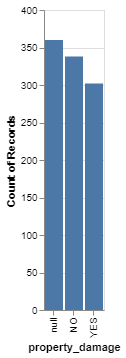

In [7]:
alt.Chart(df).mark_bar().encode(
    alt.X("property_damage"),
    y='count()',
    
)

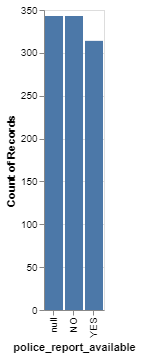

In [8]:
alt.Chart(df).mark_bar().encode(
    alt.X("police_report_available"),
    y='count()',
    
)

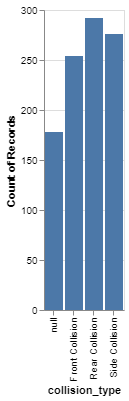

In [9]:
alt.Chart(df).mark_bar().encode(
    alt.X("collision_type"),
    y='count()',
    
)

### Imputing missing values with CategoricalImputer

In [10]:
from sklearn_pandas import CategoricalImputer
imp_mean = CategoricalImputer(missing_values=np.nan, strategy='most_frequent')
df['property_damage'] = imp_mean.fit_transform(df['property_damage'])
df['police_report_available'] = imp_mean.fit_transform(df['police_report_available'])
df['collision_type'] = imp_mean.fit_transform(df['collision_type'])

In [11]:
df.isnull().sum().sort_values(ascending=False)

fraud_reported                 0
insured_zip                    0
capital-loss                   0
capital-gains                  0
insured_relationship           0
insured_hobbies                0
insured_occupation             0
insured_education_level        0
insured_sex                    0
umbrella_limit                 0
incident_type                  0
policy_annual_premium          0
policy_deductable              0
policy_csl                     0
policy_state                   0
policy_bind_date               0
policy_number                  0
age                            0
incident_date                  0
collision_type                 0
auto_year                      0
witnesses                      0
auto_model                     0
auto_make                      0
vehicle_claim                  0
property_claim                 0
injury_claim                   0
total_claim_amount             0
police_report_available        0
bodily_injuries                0
incident_s

### Exploratory Data Analysis

In [12]:
# Creating a data frame with the data where fraud_reported is 'Y'
fraud = df['fraud_reported'] == 'Y'
df_fraud = df[fraud]

In [13]:
df_fraud

months_as_customer  age  policy_number     policy_bind_date policy_state  \
0                   328   48         521585  2014-10-17 00:00:00           OH   
1                   228   42         342868  2006-06-27 00:00:00           IN   
3                   256   41         227811  1990-05-25 00:00:00           IL   
5                   256   39         104594  2006-10-12 00:00:00           OH   
14                  180   38         644081  1998-12-28 00:00:00           OH   
15                  473   58         892874  1992-10-19 00:00:00           IN   
22                  370   55         285496  1994-05-27 00:00:00           IL   
23                  413   55         115399  1991-02-08 00:00:00           IN   
25                    8   35         699044  2013-12-05 00:00:00           OH   
27                  202   34         608513  2002-07-18 00:00:00           IN   
31                  166   37         666333  2008-06-19 00:00:00           IL   
35                  147   33         129872  2010-08-08 00:00:00           OH   
36                   62   28         200152  2003-03-09 00:00:00           IL   
39                  199   37         982871  1997-07-27 00:00:00           IN   
41                  116   34         616337  2012-08-30 00:00:00           IN   
47                  355   47         939631  1990-03-18 00:00:00           OH   
60                  154   34         598554  1990-02-14 00:00:00           IN   
63                  215   42         519312  2008-10-28 00:00:00           OH   
64                  295   42         132902  2007-04-24 00:00:00           OH   
65                  254   39         332867  1993-12-13 00:00:00           IN   
66                  107   31         356590  2011-08-17 00:00:00           IN   
70                  271   42         486676  2011-08-15 00:00:00           OH   
71                  222   41         260845  1998-11-11 00:00:00           OH   
79                  227   38         279422  2013-10-27 00:00:00           OH   
84                  284   48         498140  1997-05-15 00:00:00           IN   
89                   41   25         958857  1992-01-15 00:00:00           IN   
91                   61   23         127754  1993-06-06 00:00:00           IL   
96                  325   47         900628  2006-02-05 00:00:00           IN   
97                   29   25         235220  2014-11-01 00:00:00           IL   
106                 464   61         632627  1990-10-07 00:00:00           OH   
..                  ...  ...            ...                  ...          ...   
868                 242   44         664732  2003-07-30 00:00:00           IL   
869                  80   27         143038  2014-09-17 00:00:00           OH   
872                 290   45         219028  1991-07-18 00:00:00           OH   
875                 195   37         376879  1991-07-11 00:00:00           IL   
878                 144   37         985446  2012-10-11 00:00:00           OH   
880                 121   34         571462  1991-02-11 00:00:00           IN   
881                 398   55         815883  1991-07-02 00:00:00           OH   
883                 115   31         569714  2005-12-04 00:00:00           OH   
895                 156   38         231508  2009-09-16 00:00:00           IL   
905                 121   31         439341  1991-07-20 00:00:00           IN   
912                 175   36         155604  1992-03-03 00:00:00           OH   
915                 231   37         991553  1991-12-12 00:00:00           OH   
919                 188   33         457188  1994-04-01 00:00:00           IL   
926                 211   38         752504  1997-05-15 00:00:00           IN   
927                 156   32         449263  1992-03-20 00:00:00           IL   
929                 136   32         686522  2000-12-27 00:00:00           IN   
930                 310   48         670142  1999-08-06 00:00:00           IN   
935                 154   34        

In [14]:
df_fraud.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

### EDA of social factors

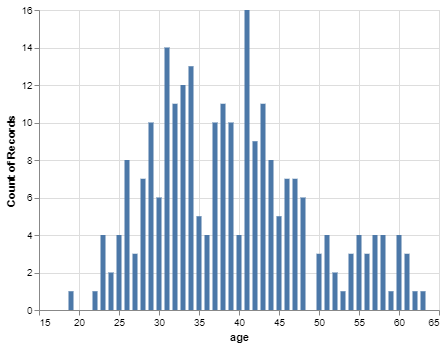

In [15]:
alt.Chart(df_fraud).mark_bar().encode(
    alt.X("age"),
    y='count()',
    
)

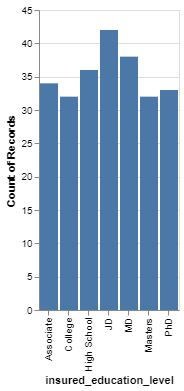

In [16]:
alt.Chart(df_fraud).mark_bar().encode(
    alt.X("insured_education_level"),
    y='count()',
    
)

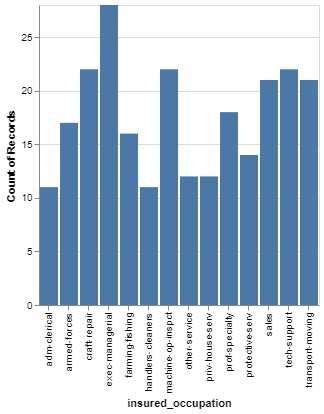

In [17]:
alt.Chart(df_fraud).mark_bar().encode(
    alt.X("insured_occupation"),
    y='count()',
    
)

### EDA of accident related factors

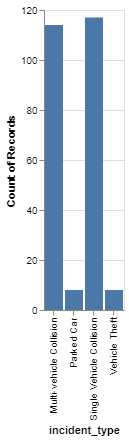

In [18]:
alt.Chart(df_fraud).mark_bar().encode(
    alt.X("incident_type"),
    y='count()',
    
)

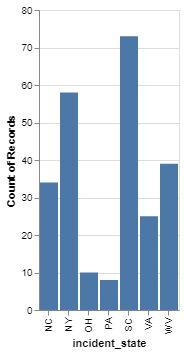

In [19]:
alt.Chart(df_fraud).mark_bar().encode(
    alt.X("incident_state"),
    y='count()',
    
)

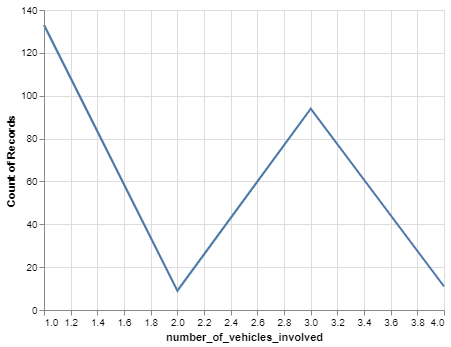

In [20]:
alt.Chart(df_fraud).mark_line().encode(
    alt.X("number_of_vehicles_involved"),
    y='count()',
    
)

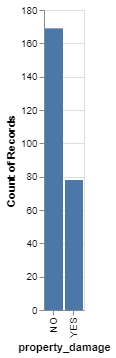

In [21]:
alt.Chart(df_fraud).mark_bar().encode(
    alt.X("property_damage"),
    y='count()',
    
)

In [22]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

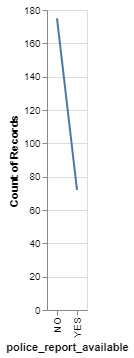

In [23]:
alt.Chart(df_fraud).mark_line().encode(
    alt.X("police_report_available"),
    y='count()'
)

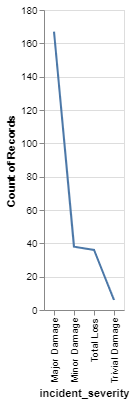

In [24]:
alt.Chart(df_fraud).mark_line().encode(
    alt.X("incident_severity"),
    y='count()'
)

## Converting categorical features to numeric

In [25]:
#Slicing policy_bind_date to get the year
df['policy_bind_date'] = df['policy_bind_date'].str.slice(0,4).astype(int)

#Using one hot encoding for US states
df['policy_state'] = df['policy_state'].astype('category').cat.codes 

# Getting all the unique values for policy_csl
df['policy_csl'].unique()

df['policy_csl'] = df['policy_csl'].replace(to_replace = '250/500', value=750)
df['policy_csl'] = df['policy_csl'].replace(to_replace = '100/300', value=400)
df['policy_csl'] = df['policy_csl'].replace(to_replace = '500/1000', value=1500)

# Encoding Male as 0, Female as 1
df['insured_sex'] = df['insured_sex'].replace(to_replace = 'MALE', value=0)
df['insured_sex'] = df['insured_sex'].replace(to_replace = 'FEMALE', value=1)

# Getting unique values for insured_education_level
df['insured_education_level'].unique()

df['insured_education_level'] = df['insured_education_level'].replace(to_replace = 'High School', value=0)
df['insured_education_level'] = df['insured_education_level'].replace(to_replace = ['College','Associate'], value=1)
df['insured_education_level'] = df['insured_education_level'].replace(to_replace = ['Masters','MD','JD'], value=2)
df['insured_education_level'] = df['insured_education_level'].replace(to_replace = 'PhD', value=3)

#Using one hot encoding for insured_occupation, insured_hobbies and insured_relationship
df['insured_occupation'] = df['insured_occupation'].astype('category').cat.codes
df['insured_hobbies'] = df['insured_hobbies'].astype('category').cat.codes
df['insured_relationship'] = df['insured_relationship'].astype('category').cat.codes

#Slicing incident_date to get the year
df['incident_date'] = df['incident_date'].str.slice(0,4).astype(int)

# Getting unique values for incident_type
df['incident_type'].unique()

df['incident_type'] = df['incident_type'].replace(to_replace = ['Vehicle Theft','Parked Car'], value=0)
df['incident_type'] = df['incident_type'].replace(to_replace = 'Single Vehicle Collision', value=1)
df['incident_type'] = df['incident_type'].replace(to_replace = 'Multi-vehicle Collision', value=2)

#Using one hot encoding for US states
df['collision_type'] = df['collision_type'].astype('category').cat.codes 

df['incident_severity'].unique()

df['incident_severity'] = df['incident_severity'].replace(to_replace = ['Trivial Damage','Minor Damage'], value=0)
df['incident_severity'] = df['incident_severity'].replace(to_replace = 'Major Damage', value=1)
df['incident_severity'] = df['incident_severity'].replace(to_replace = 'Total Loss', value=2)

df['authorities_contacted'].unique()

df['authorities_contacted'] = df['authorities_contacted'].replace(to_replace = ['None','Other'], value=0)
df['authorities_contacted'] = df['authorities_contacted'].replace(to_replace = 'Fire', value=1)
df['authorities_contacted'] = df['authorities_contacted'].replace(to_replace = ['Police','Ambulance'], value=2)

#Using one hot encoding for incident_state, incident_city auto_make and auto_model
df['incident_state'] = df['incident_state'].astype('category').cat.codes
df['incident_city'] = df['incident_city'].astype('category').cat.codes
df['auto_make'] = df['auto_make'].astype('category').cat.codes
df['auto_model'] = df['auto_model'].astype('category').cat.codes

df = df.drop('incident_location', axis=1)

# Encoding No as 0, Yes as 1 for property_damage,police_report_available and fraud_reported
df['property_damage'] = df['property_damage'].replace(to_replace = 'NO', value=0)
df['property_damage'] = df['property_damage'].replace(to_replace = 'YES', value=1)
df['police_report_available'] = df['police_report_available'].replace(to_replace = 'NO', value=0)
df['police_report_available'] = df['police_report_available'].replace(to_replace = 'YES', value=1)
df['fraud_reported'] = df['fraud_reported'].replace(to_replace = 'N', value=0)
df['fraud_reported'] = df['fraud_reported'].replace(to_replace = 'Y', value=1)

df = df.drop('policy_number', axis=1)

In [26]:
df = df.drop('incident_date', axis=1)

### Feature Engineering: Removing multicolinearity and outliers

In [27]:
# Complete numerical correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns

corrmat = df.corr(method="spearman")
f, ax = plt.subplots(figsize=(12, 9))
corrmat
sns.heatmap(corrmat, xticklabels=True, yticklabels=True);

In [28]:
corrmat

months_as_customer       age  policy_bind_date  \
months_as_customer                     1.000000  0.912725         -0.046236   
age                                    0.912725  1.000000         -0.035675   
policy_bind_date                      -0.046236 -0.035675          1.000000   
policy_state                          -0.001954 -0.020022         -0.007071   
policy_csl                            -0.025365 -0.008359         -0.014865   
policy_deductable                      0.016145  0.022527         -0.051291   
policy_annual_premium                  0.020084  0.030759         -0.001756   
umbrella_limit                         0.004919  0.001981          0.058002   
insured_zip                            0.012951  0.008522          0.008555   
insured_sex                           -0.058983 -0.070762          0.033587   
insured_education_level                0.019107  0.025241          0.022388   
insured_occupation                     0.010640  0.018004         -0.026192   
insured_hobbies                       -0.097576 -0.082524         -0.014074   
insured_relationship                   0.068747  0.064081         -0.008308   
capital-gains                         -0.005428 -0.020973          0.040781   
capital-loss                           0.013624  0.001411         -0.025145   
incident_type                          0.030070  0.031389          0.043960   
collision_type                        -0.062446 -0.062037          0.026471   
incident_severity                     -0.017777 -0.009493          0.005923   
authorities_contacted                 -0.004928  0.006490         -0.010399   
incident_state                         0.009409  0.010010         -0.030113   
incident_city                          0.007437  0.007320         -0.011281   
incident_hour_of_the_day               0.075522  0.095261          0.036253   
number_of_vehicles_involved            0.015879  0.020714          0.029497   
property_damage                        0.003007 -0.008422          0.018814   
bodily_injuries                       -0.016556 -0.019354          0.028929   
witnesses                              0.056636  0.047442          0.056141   
police_report_available               -0.020709 -0.016087         -0.011497   
total_claim_amount                     0.052744  0.065135         -0.015645   
injury_claim                           0.063605  0.074304         -0.000741   
property_claim                         0.025255  0.055536         -0.003441   
vehicle_claim                          0.048206  0.051485         -0.013156   
auto_make                              0.040007  0.016387         -0.006384   
auto_model                            -0.005941  0.011904          0.028620   
auto_year                              0.004376  0.005606          0.013733   
fraud_reported                         0.015133  0.003637          0.000587   

                             policy_state  policy_csl  policy_deductable  \
months_as_customer              -0.001954   -0.025365           0.016145   
age                             -0.020022   -0.008359           0.022527   
policy_bind_date                -0.007071   -0.014865          -0.051291   
policy_state                     1.000000    0.001925           0.008295   
policy_csl                       0.001925    1.000000           0.001650   
policy_deductable                0.008295    0.001650           1.000000   
policy_annual_premium            0.014834    0.017475           0.003461   
umbrella_limit                  -0.024380    0.020907           0.001609   
insured_zip                      0.024870    0.006462          -0.004514   
insured_sex                      0.020569    0.009164           0.012103   
insured_education_level         -0.004132   -0.003614           0.017557   
insured_occupation              -0.030843    0.013175          -0.054664   
insured_hobbies                 -0.035883   -0.004120          -0.006104   
insured_relationship            -0.018020

In [29]:
# Dropping colinear variables
df = df.drop('months_as_customer', axis=1)
df = df.drop('vehicle_claim', axis=1)
df = df.drop('injury_claim', axis=1)
df = df.drop('property_claim', axis=1)

### Box plot analysis

C:\Users\maila\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
C:\Users\maila\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
C:\Users\maila\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may cons

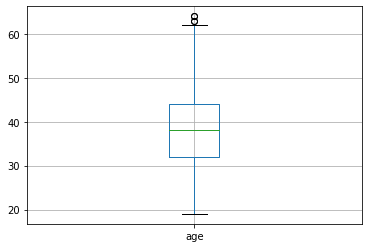

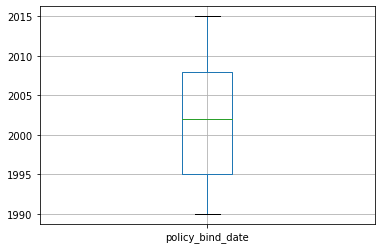

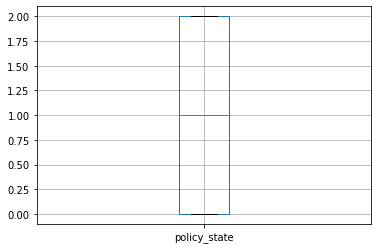

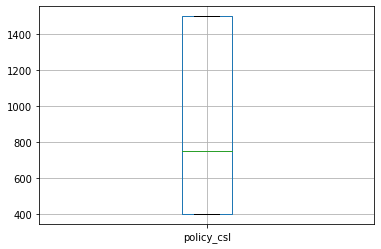

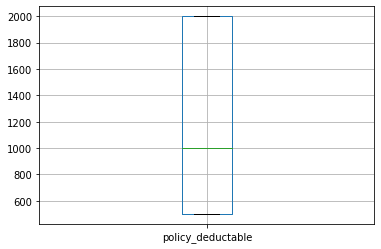

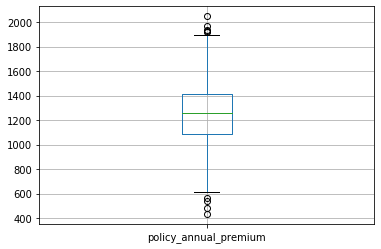

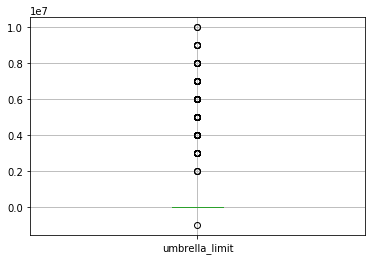

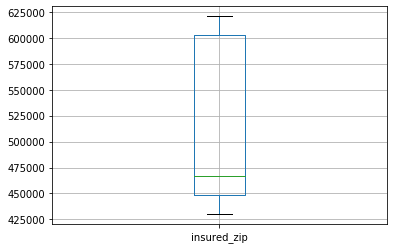

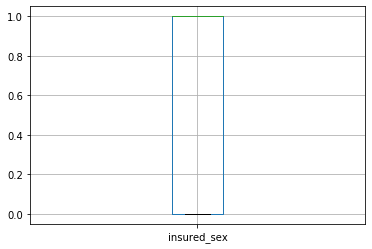

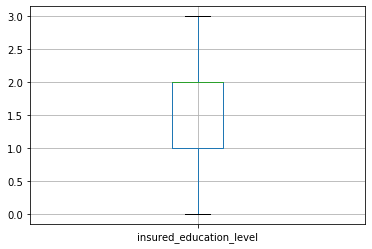

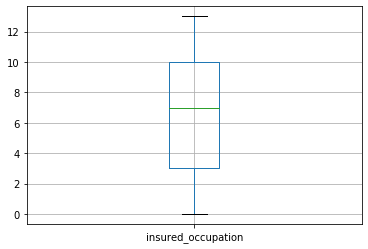

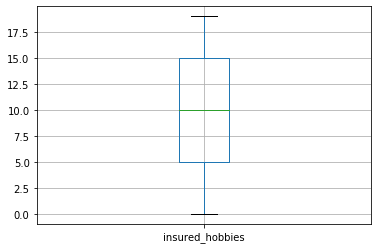

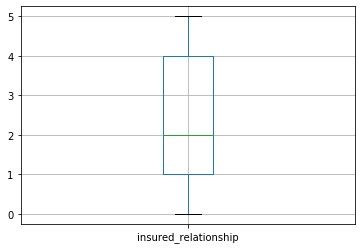

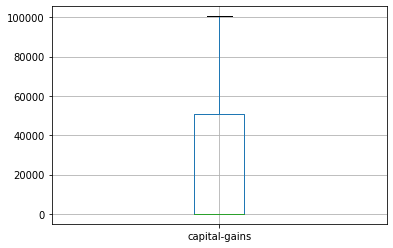

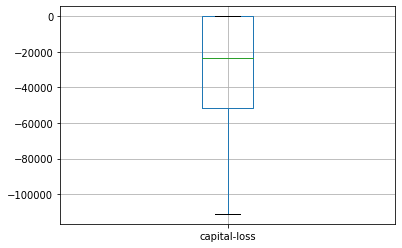

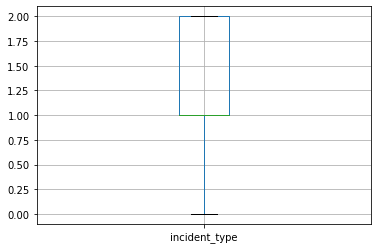

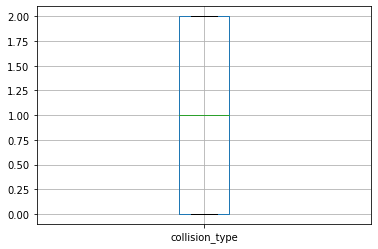

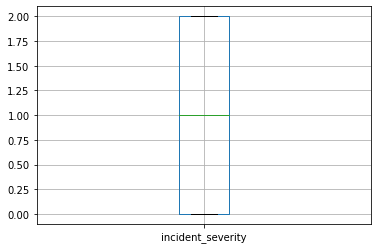

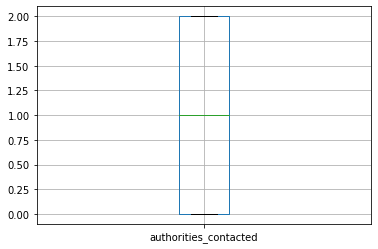

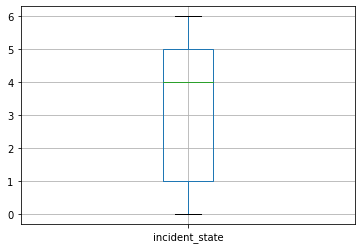

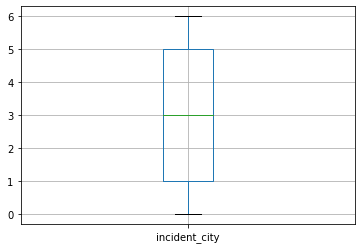

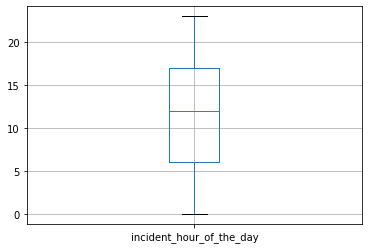

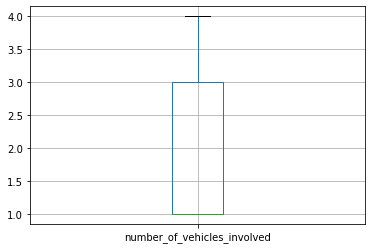

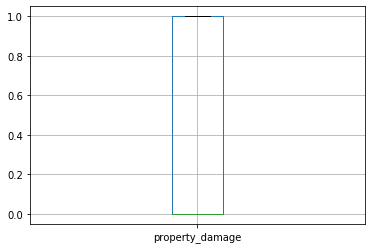

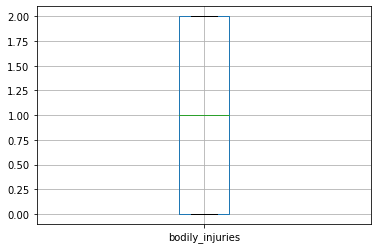

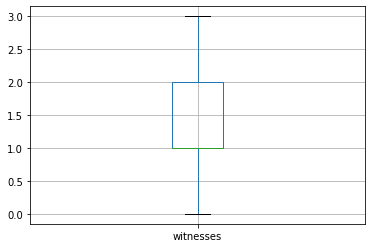

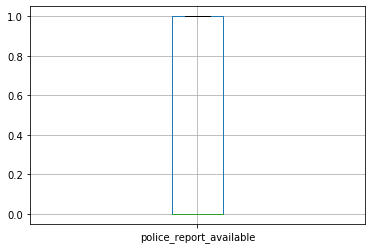

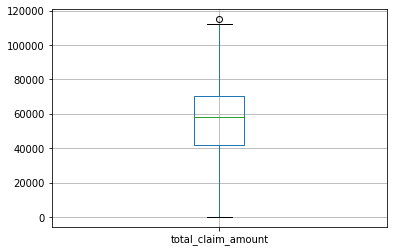

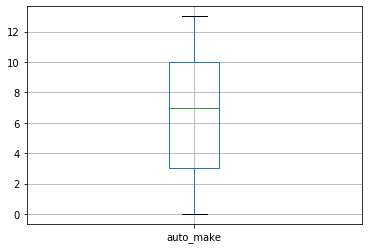

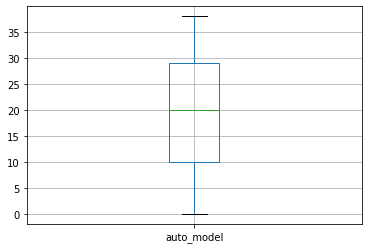

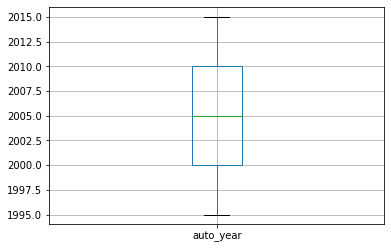

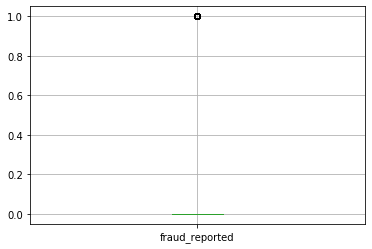

In [30]:
import seaborn as sns
for column in df.columns:
    #print(column)
    plt.figure()
    df.boxplot([column])

### Removing outliers

In [31]:
# From the box plot analysis, it is clear that columns 'umbrella_limit' & 'policy_annual_premium' have outliers
df = df[df.policy_annual_premium>600]
df = df[df.policy_annual_premium<1900]

In [32]:
# As in umbrella_limit, most values will be 0, if outliers are removed, it is better to drop the column
df = df.drop('umbrella_limit', axis=1)

### Creating test and train data

In [33]:
y = df['fraud_reported']
x = df.drop('fraud_reported', axis=1)

print('Target dimentions: ',y.shape)
print('Independent data dimentions: ',x.shape)

import sklearn.model_selection as model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, train_size=0.7,test_size=0.3, random_state=101)

print('x_train dimentions: ',x_train.shape)
print('y_train  dimentions: ',y_train.shape)
print('x_test dimentions: ',x_test.shape)
print('y_test  dimentions: ',y_test.shape)

# As all dimentions are correct, we can move towards model creation, training and testing

Target dimentions:  (991,)
Independent data dimentions:  (991, 30)
x_train dimentions:  (693, 30)
y_train  dimentions:  (693,)
x_test dimentions:  (298, 30)
y_test  dimentions:  (298,)


### Machine Learning<br><br>Creating the model

In [34]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()
    ]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

### Training and testing

In [35]:
for clf in classifiers:
    clf.fit(x_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(x_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(x_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

KNeighborsClassifier
****Results****
Accuracy: 68.1208%
Log Loss: 3.743256266884355


C:\Users\maila\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC
****Results****
Accuracy: 77.1812%
Log Loss: 0.5387736853928119


C:\Users\maila\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


NuSVC
****Results****
Accuracy: 77.1812%
Log Loss: 0.5389706232687972
DecisionTreeClassifier
****Results****
Accuracy: 78.1879%
Log Loss: 7.533625723722129
RandomForestClassifier
****Results****
Accuracy: 78.5235%
Log Loss: 0.6783775863374876
AdaBoostClassifier
****Results****
Accuracy: 80.8725%
Log Loss: 0.6652142411874223

C:\Users\maila\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



GradientBoostingClassifier
****Results****
Accuracy: 83.8926%
Log Loss: 0.3688048535936928
GaussianNB
****Results****
Accuracy: 77.1812%
Log Loss: 0.5445188500808464
LinearDiscriminantAnalysis
****Results****
Accuracy: 76.5101%
Log Loss: 0.5493932533235911
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 71.8121%
Log Loss: 0.8194171119720822


In [36]:
df.columns

Index(['age', 'policy_bind_date', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'insured_zip',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')